# Matching Pennies using Functions

In [9]:
import numpy as np
from IPython import display
from TwoTimesTwoGamesFunctions import updateStrategy, plot, trajectory, plotTrajectory, computeStablePoints, plotStableRegion, checkStability, calculateFrequencies, plotFrequencies

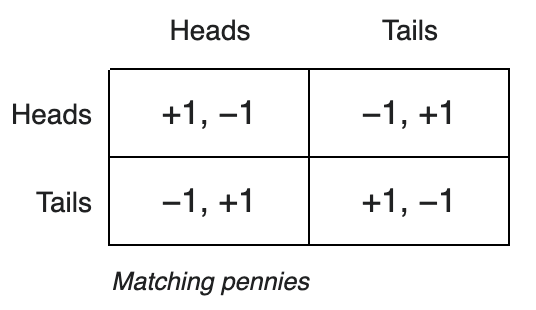

In [10]:
display.Image("/Users/henningheyen/Desktop/Studium/TUM/BachelorThesis/Git/NoRegretLearning/Screenshots/MatchingPenniesWikipedia.png", width = 300)

In [11]:
######### Initialization ######### (note: utility maximization)

# player 1:
payoff1 = np.array([[1,-1],[-1,1]])

# player 2:
payoff2 = np.array([[-1,1],[1,-1]])

#number of iterations
iterations = int(20000)

#number of vectors in the plot = gridSize^2
gridSize = 15

#game title
gameName = "Matching Pennies"

#name of first strategy 
nameOfStrategy1 = "Heads"
nameOfStrategy2 = "Heads"

######### Equilibria #########

#Pure Nash Equilibria
pne = []

#Mixed Nash Equilibria 
#sytax: (..., (P1(strategy1),P2(strategy1)), ... )
mne = [[0.5,0.5]]


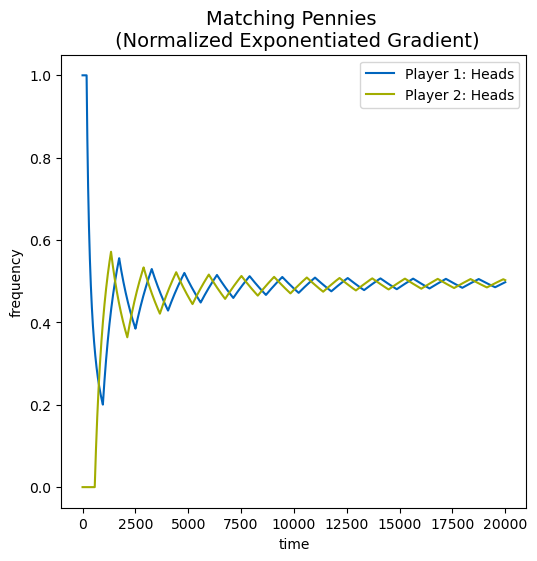

In [12]:
# EMPIRICAL FREQEUNCY DISTRIBUTION # converges to MNE

p1Init = 0.6
p2Init = 0.4
frequencyStrategy1Action1, frequencyStrategy2Action1 = calculateFrequencies(p1Init, p2Init,
                                                                            iterations, payoff1,
                                                                            payoff2, "NormalizedEG")

plotFrequencies(iterations, frequencyStrategy1Action1, frequencyStrategy2Action1,
                nameOfStrategy1, nameOfStrategy2, gameName, "NormalizedEG")

In [13]:
########## Online Mirror Ascent One Update Step #############

diff1, diff2 = updateStrategy(iterations, gridSize, payoff1, payoff2, "NormalizedEG")

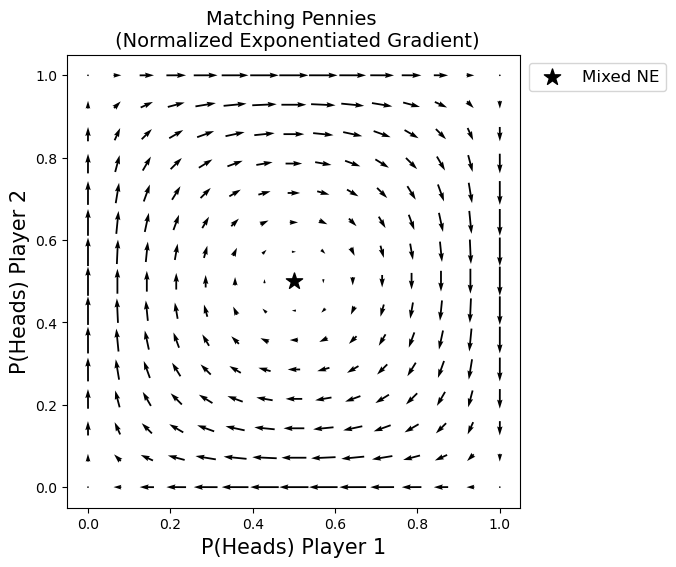

In [7]:
#quiver plot
#note plotType should be "quiver" or "stream"
#The last three argument are optional. If a stable regions w.r.t some Nash Equilibria
#should be plotted they all three have to be provided
plot(gridSize, diff1, diff2, pne, mne, gameName, nameOfStrategy1, nameOfStrategy2, "NormalizedEG", "quiver")

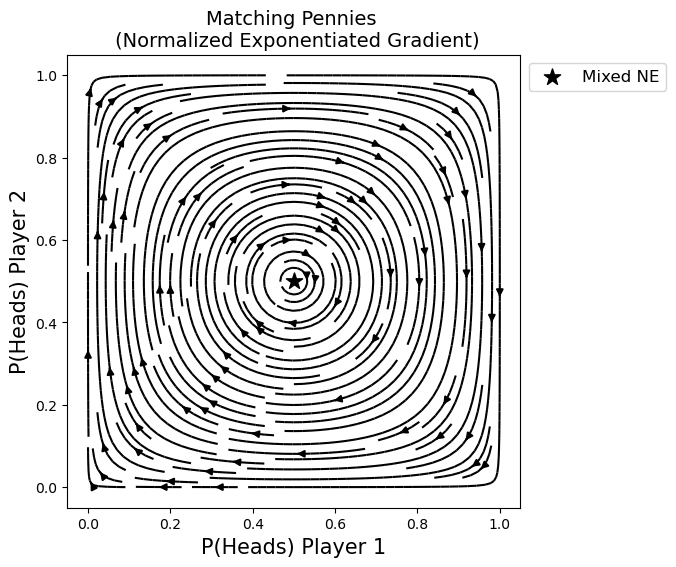

In [8]:
#streamPlot:
plot(gridSize, diff1, diff2, pne, mne, gameName, nameOfStrategy1, nameOfStrategy2, "NormalizedEG", "stream")

In [ ]:
#Check the stability of one specific point
point1 = checkStability(0.4, 0.1, payoff1, payoff2, mne[0])
print(point1)

In [ ]:
#plotting a single trajectory

p1Init = 0.5
p2Init = 0.6

p1, p2 = trajectory(p1Init, p2Init, iterations, payoff1, payoff2, "NormalizedEG")
plotTrajectory(p1Init, p2Init, p1, p2, pne, mne, gameName, nameOfStrategy1, nameOfStrategy2, "NormalizedEG")

In [ ]:
########## Online Gradient Ascent One Update Step #############

diff1, diff2 = updateStrategy(iterations, gridSize, payoff1, payoff2, "ProjOGA")

In [ ]:
#quiver plot
#note last argument should be "quiver" or "stream"
plot(gridSize, diff1, diff2, pne, mne, gameName, nameOfStrategy1, nameOfStrategy2, "ProjOGA", "stream")

In [ ]:
#plotting a single trajectory

p1Init = 0.1
p2Init = 0.1

p1, p2 = trajectory(p1Init, p2Init, iterations, payoff1, payoff2, "ProjOGA")
plotTrajectory(p1Init, p2Init, p1, p2, pne, mne, gameName, nameOfStrategy1, nameOfStrategy2, "ProjOGA")